In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import string
import spacy
import re

In [2]:
url = "https://insights.blackcoffer.com/will-machine-replace-the-human-in-the-future-of-work/"

In [3]:
headers = {"User-Agent": "google chrom"}
webpage = requests.get(url, headers = headers)
soup = BeautifulSoup(webpage.content, 'html.parser')

In [4]:
# Extracting articles from title

In [5]:
head = soup.find('h1', class_="entry-title")
head = head.text.replace('\n', " ")
# head

In [6]:
# Extracting content from the article

In [7]:
pageContent = soup.findAll(attrs={'class': 'td-post-content'})
pageContent = pageContent[0].text.replace('\n', " ");
# pageContent

In [8]:
# Punctuation
pageContent = pageContent.translate(str.maketrans('','', string.punctuation))
# pageContent

In [9]:
# Tokenization
import nltk
# nltk.download()

In [10]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(pageContent)
# print(tokens[0:70])

In [11]:
# len(tokens)

In [12]:
import nltk
from nltk.corpus import stopwords

#downloading the required packages from download

# nltk.download()

In [13]:
stop_words = stopwords.words('english')
stop_words.append('the')
no_stop_tokens = [words for words in tokens if not words in stop_words]

In [14]:
# print(no_stop_tokens[0:50])

In [15]:
# len(no_stop_tokens)

In [16]:
# len(stop_words)

In [17]:
# stop_words[0:50]

In [18]:
with open(r"C:\Users\harsh\OneDrive\Documents\positive-words.txt", "r") as positive:
    positivewords = positive.read().split('\n')
    positivewords = positivewords[5:]

In [19]:
# downloading the positive words dictionary and storing in the local system for speeding up the process

In [20]:
positive_count = " ".join([word for word in no_stop_tokens if word in positivewords])

positive_count = positive_count.split(" ")

# positive_count

In [21]:
# positive Score
Positive_score = len(positive_count)
(Positive_score)

72

In [22]:
with open(r"C:\Users\harsh\OneDrive\Documents\negative-words.txt", "r", encoding = "ISO-8859-1") as negative:
    negativewords = negative.read().split("\n")
    
negativewords = negativewords[36:]

In [23]:
negative_count = " ".join([word for word in no_stop_tokens if word in negativewords])
negative_count = negative_count.split(" ")

In [24]:
# Negative Score

In [25]:
Negative_score = len(negative_count)
(Negative_score)

25

In [26]:
filter_content = ' '.join(no_stop_tokens)

In [27]:
df = [[url,head,pageContent,filter_content,Positive_score,Negative_score]]

In [28]:
df = pd.DataFrame(df,columns=["url", "head", "pageContent", "filter_content","Positive_score","Negative_score"])

In [29]:
# Calculate polarity score and subjectivity score

In [30]:
from textblob import TextBlob

def sentiment_analysis(df):
    sentiment = TextBlob(df["pageContent"]).sentiment
    return pd.Series([sentiment.polarity, sentiment.subjectivity])

In [31]:
df[["polarity", "subjectivity"]] = df.apply(sentiment_analysis, axis=1)
# df

In [32]:
# Polarity Score

polarity_score = df[['polarity']]
# print(polarity_score)
polarity_score

,polarity
0,0.141419


In [33]:
#Subjectivity Score

subjectivity_score = df[['subjectivity']]
(subjectivity_score)

,subjectivity
0,0.487387


In [34]:
# Average length of Sentence

In [35]:
avg_sentence_length = len(pageContent.replace(' ',''))/len(re.split(r'[?!.]', pageContent))
# print('Word average = ', avg_length)
(avg_sentence_length)

8061.0

In [36]:
# Fog Index

In [37]:
import textstat

In [38]:
Fog_index = (textstat.gunning_fog(pageContent))
(Fog_index)

663.27

In [39]:
# Average number of words per sentence

In [40]:
avg_len_per_sentence = [len(l.split()) for l in re.split(r'[?!.]',pageContent) if l.strip()]
avg_len_per_sentence = (sum(avg_len_per_sentence)/len(avg_len_per_sentence))
print(avg_len_per_sentence)

1650.0


In [41]:
# Complex word count

In [42]:
def syl_count(word):
    count = 0
    vowels = "AEIOUaeiou"
    if word[0] in vowels:
        count += 1
    for i in range(1, len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1
            if word.endswith("es" or "ed"):
                count -= 1
            
    if count == 0:
        count += 1
    return count

In [43]:
complex_words = syl_count(pageContent)
(complex_words)

2802

In [44]:
# Word Count

In [45]:
word_count = len(pageContent)
(word_count)

9715

In [46]:
# Percentage of Complex words

In [47]:
percent_complex_words = (complex_words/word_count)*100
(percent_complex_words)

28.841996911991764

In [48]:
# Personal Pronouns

In [49]:
import nltk

# downloading averaged perceptron tagger package
# nltk.download()

In [50]:
def ProperNounExtractor(text):
    count = 0
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for(word, tag) in tagged:
            if tag == 'PRP':
                count += 1
    
    return count

In [51]:
# Extracting all the proper nouns by calling the propernounextractor function

personal_pronouns = ProperNounExtractor(pageContent)
(personal_pronouns)

49

In [52]:
# average words length

avg_len = len(pageContent.replace(' ',''))/len(pageContent.split())
(avg_len)

4.885454545454546

In [53]:
# syllable per word

In [54]:
word = pageContent.replace(' ','')
syllable = 0
for w in word:
    if(w == 'a' or w == 'e' or w == 'i' or w == 'o' or w == 'u' or w == 'A' or w == 'E' or w == 'I' or w == 'O' or w == 'U'):
        syllable += 1
        

syllable_per_word = syllable/len(pageContent.split())
(syllable_per_word)


1.8848484848484848

In [55]:
# For Wordcloud

In [56]:
# importing Packages

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

def cloudplt(wordcloud):
    plt.figure(figsize=(35,35))
    plt.imshow(wordcloud)
    plt.axis("off")

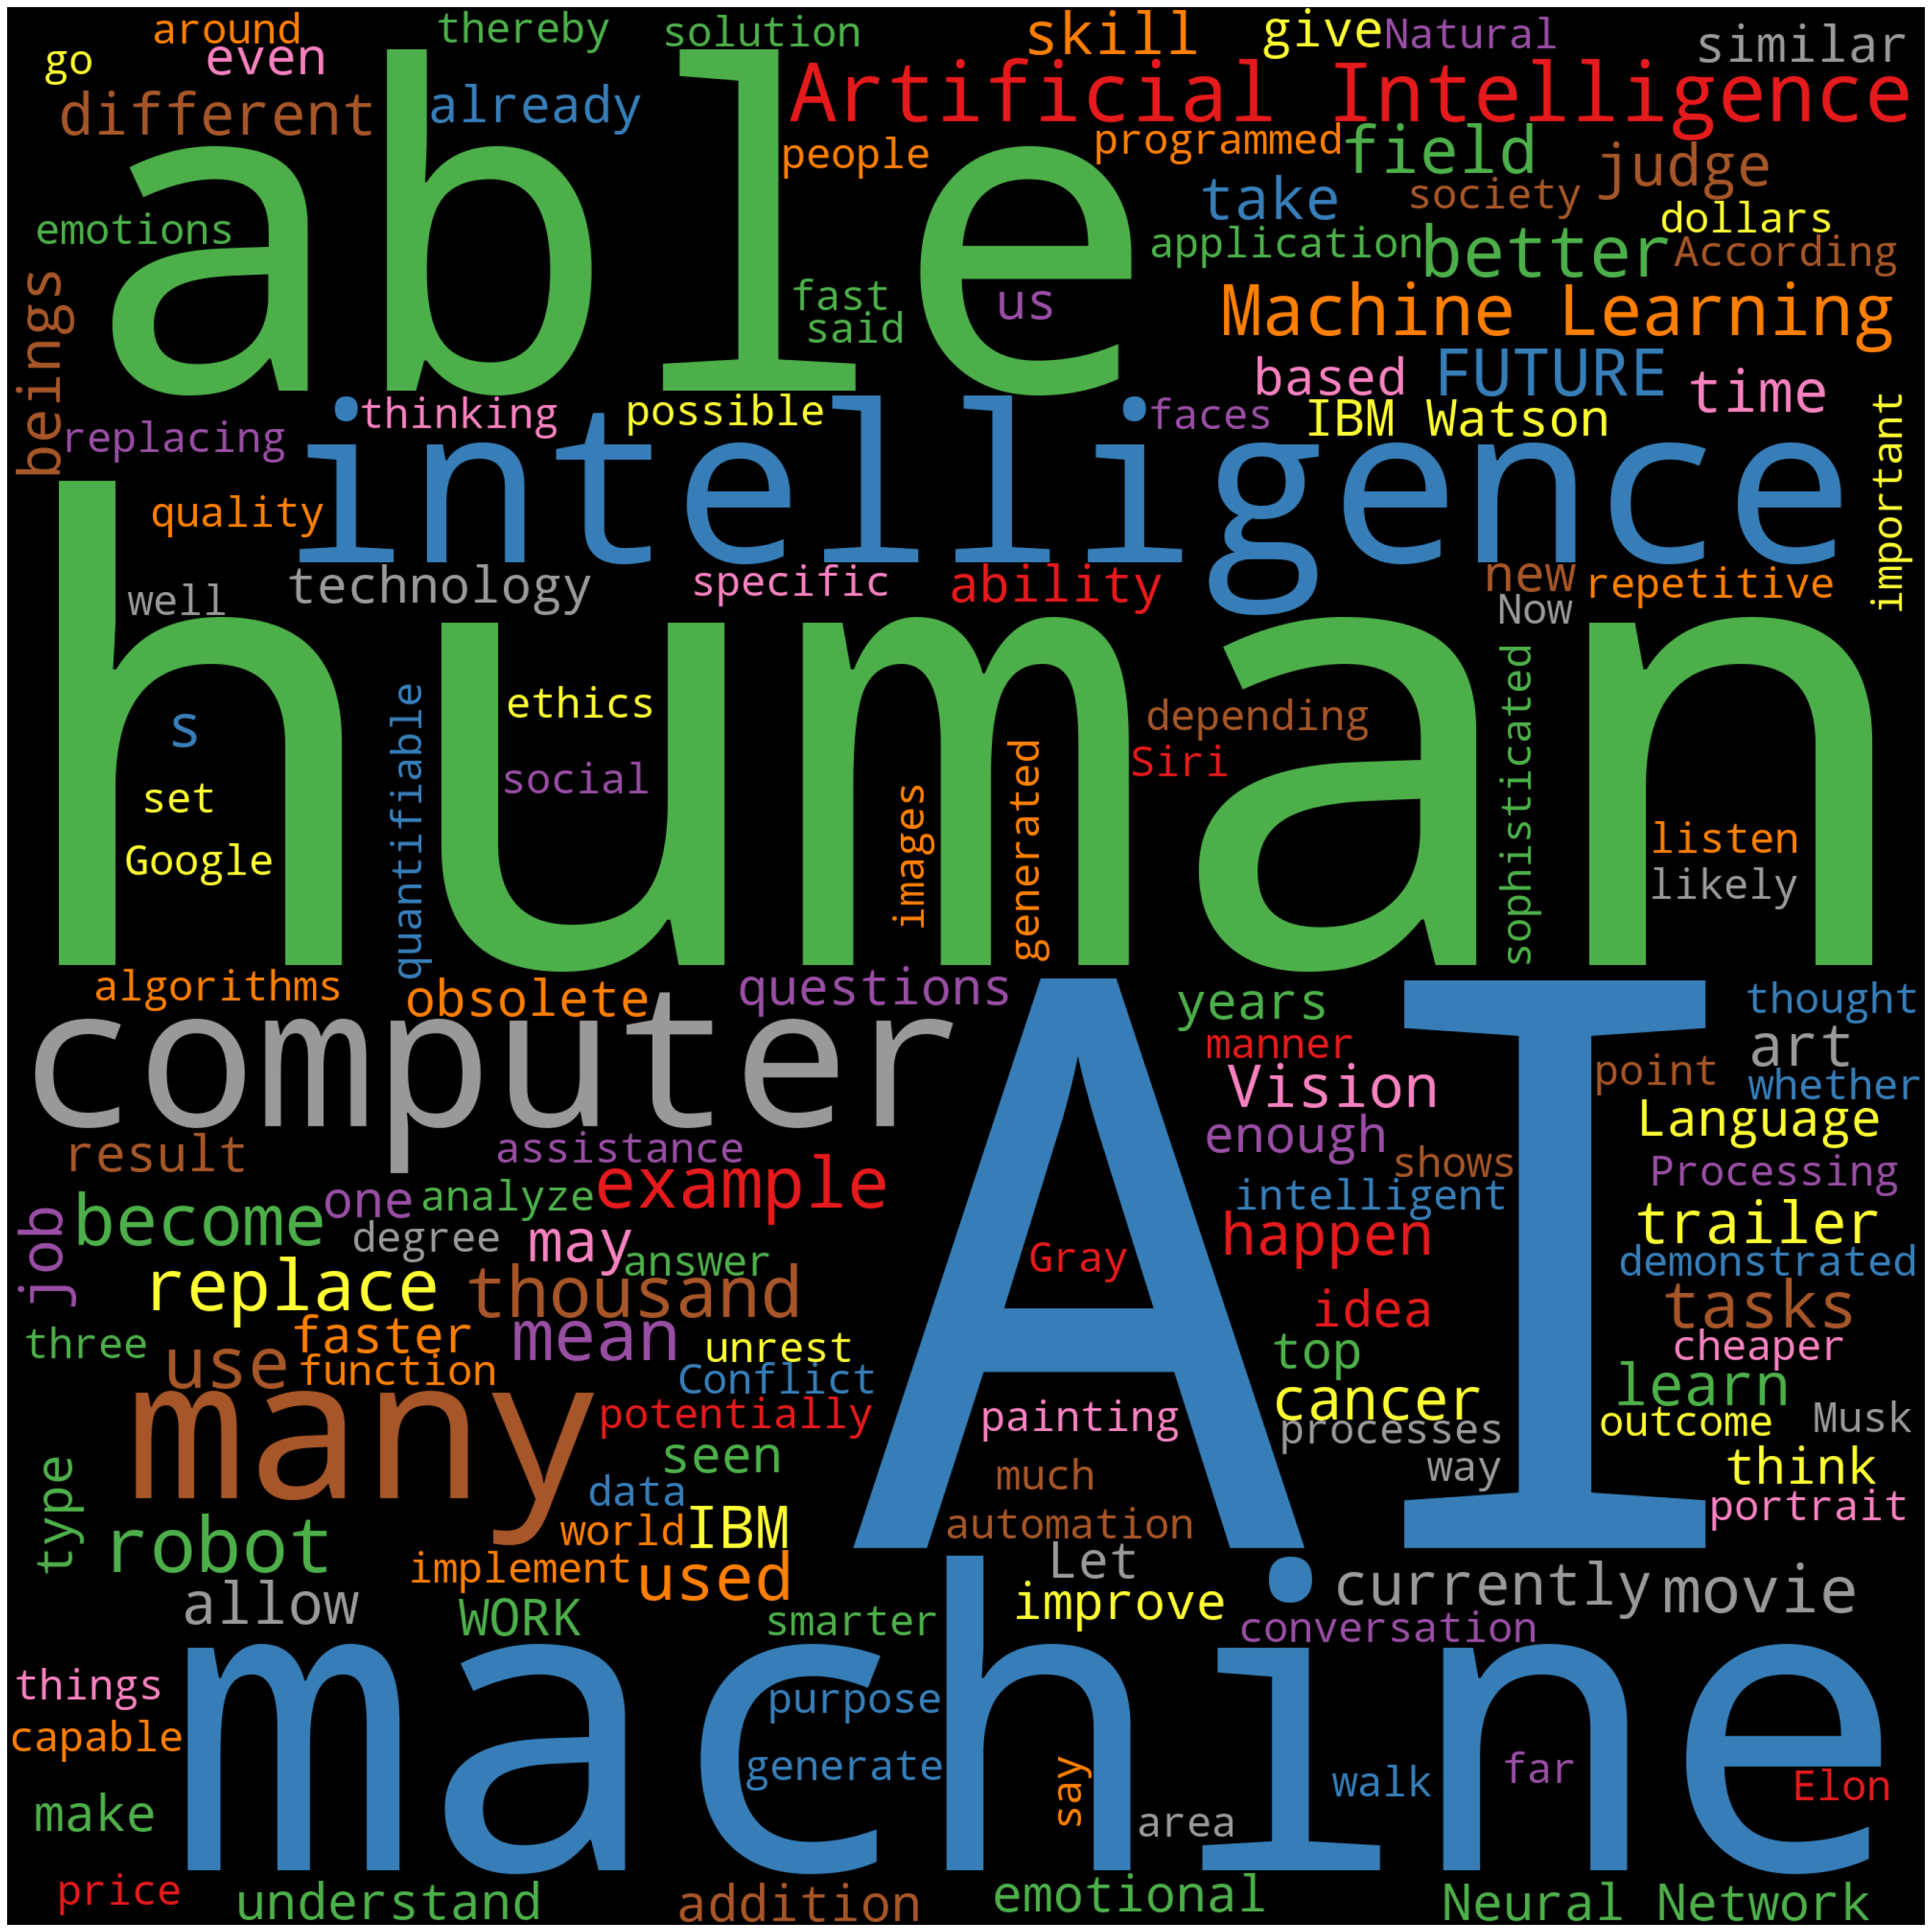

In [63]:
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(width=2000, height=2000, background_color='black', max_words=150, colormap='Set1', stopwords=stopwords).generate(pageContent)

cloudplt(wordcloud)

In [64]:
# positive word cloud

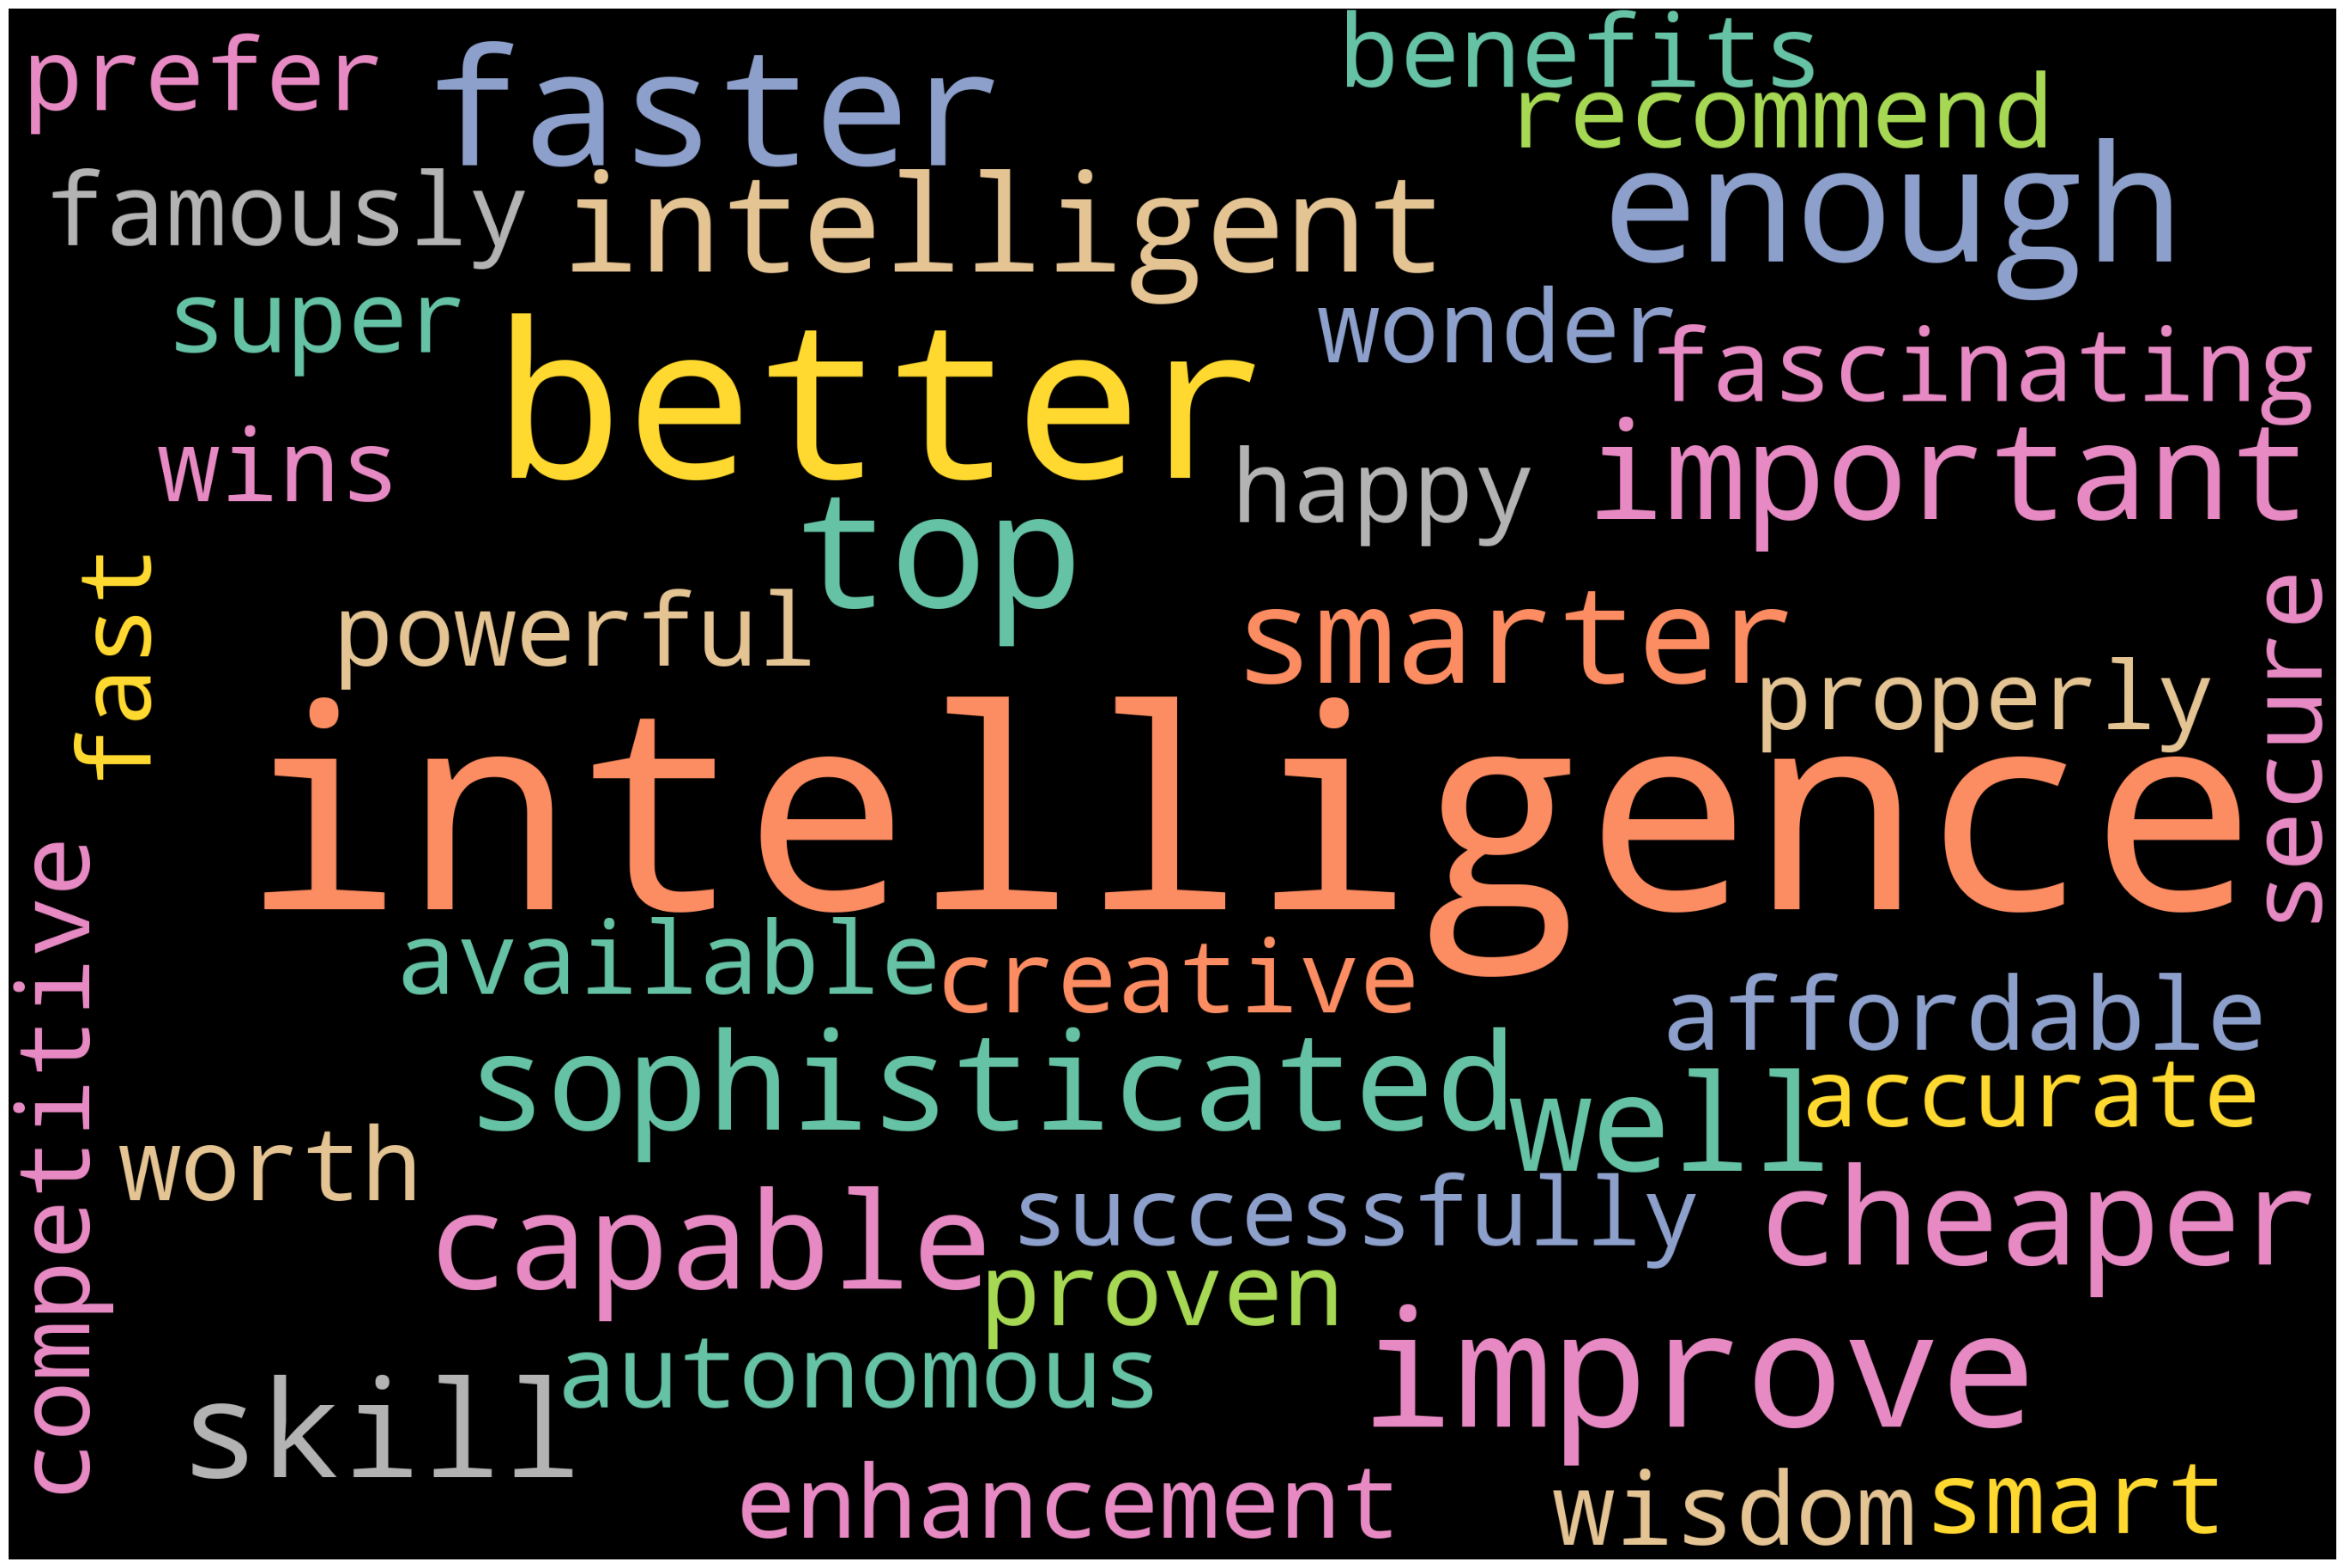

In [65]:
# for this we will select the words which only belong to positivewords

positive_review = " ".join([word for word in positive_count if word in positivewords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(positive_review)

cloudplt(wordcloud)

In [66]:
# Negative Word Cloud

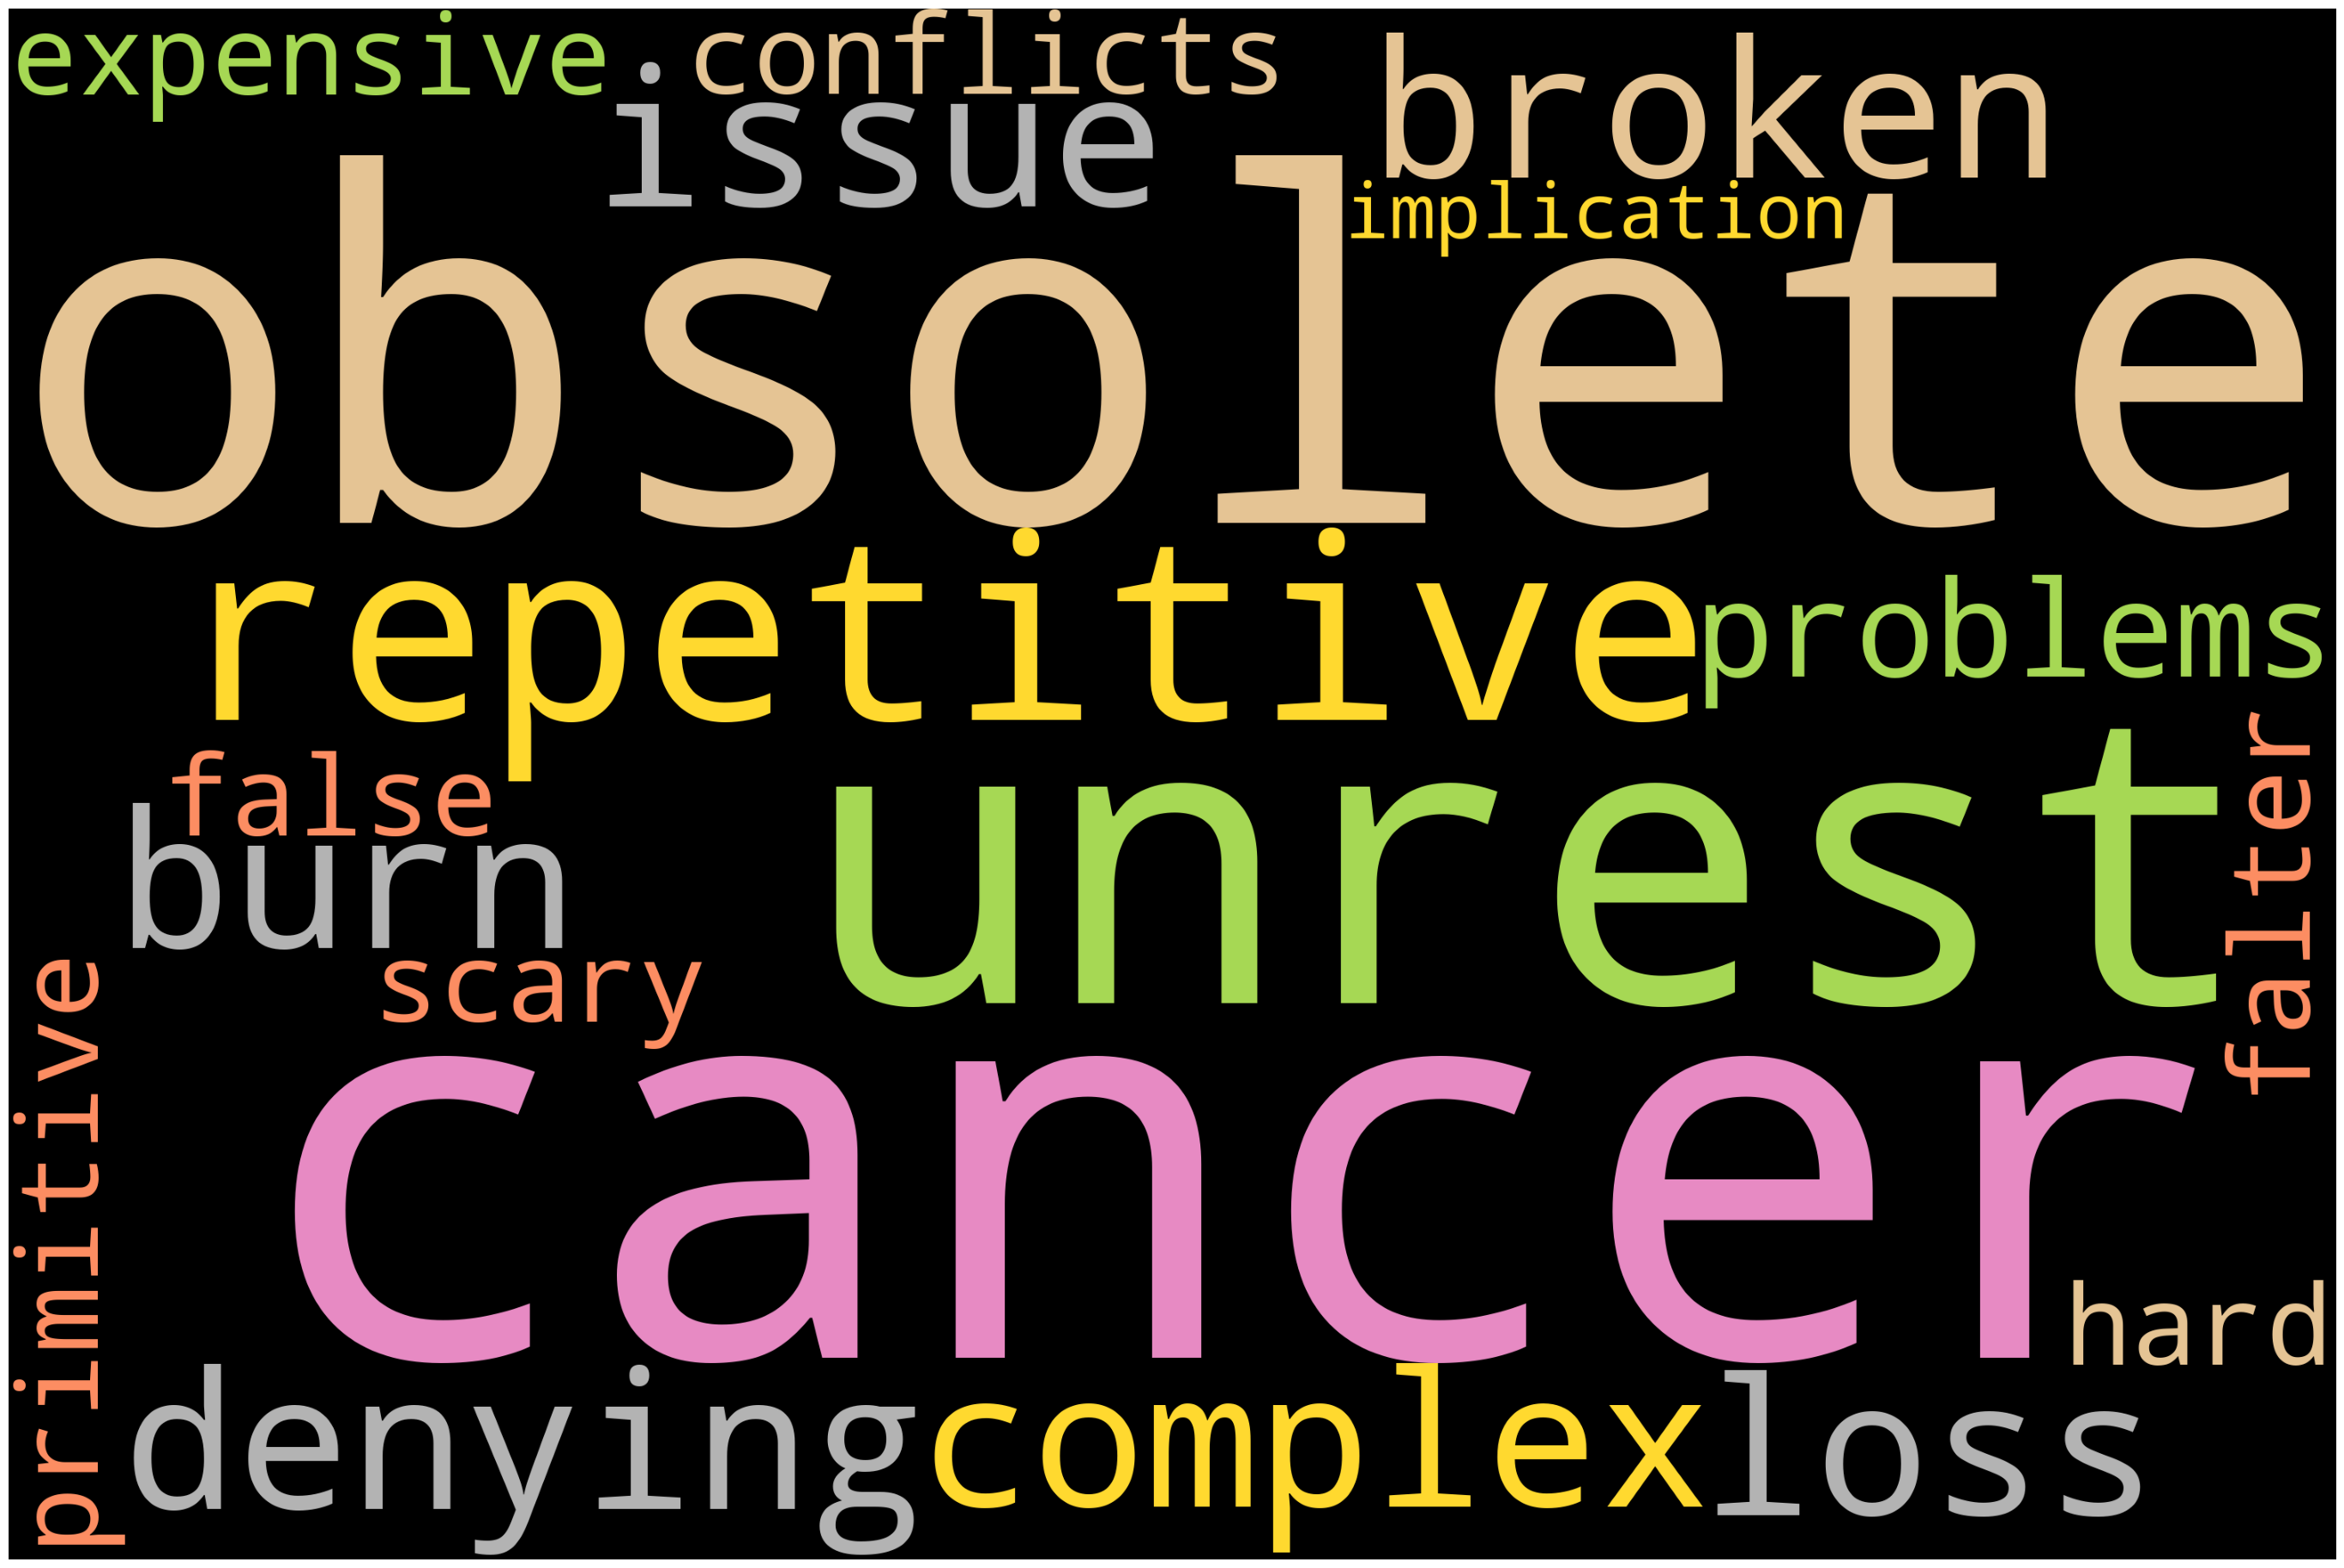

In [67]:
# for this we will only select words which are present in negativewords
negative_review = " ".join ([word for word in negative_count if word in negativewords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(negative_review)
#Plot
cloudplt(wordcloud)